In [40]:
# Model Evaluation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston, load_iris, load_digits
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_classification

from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

from sklearn.model_selection import learning_curve, validation_curve

In [3]:
# Cross-Validating Models

# load data
digits = datasets.load_digits()
# create feature matrix
features= digits.data
# create target vector
target =digits.target

# create standirdizer
standardizer = StandardScaler()
# create logistic regression object
logit = LogisticRegression()
# create pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# create k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# conduct k-fold cross-valisation
cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring='accuracy',
                            n_jobs=-1)

# calculate mean
cv_results.mean()

0.9693916821849783

In [5]:
# create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# fit standardizer to training set
standardizer.fit(features_train)

# apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standatdizer.transform(features_test)
# in pipeline scikit does all that work for us

In [8]:
# Creating a Baseline Regression Model

# load data
boston = load_boston()
# create features
features, target = boston.data, boston.target

# make test and training split
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')
# train dummy regressor
dummy.fit(features_train, target_train)
# get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [11]:
# to compare get another model
ols = LinearRegression()
ols.fit(features_train, target_train)
# get R-squared
ols.score(features_test, target_test)

0.6354638433202114

In [14]:
# Creating a Baseline Classification Model

# load data
iris = load_iris()
# create feature matrix and target vector
features, target = iris.data, iris.target

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# train model
dummy.fit(features_train, target_train)

# get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [16]:
# to compare get another model
classifier = RandomForestClassifier()
# train model
classifier.fit(features_train, target_train)
# get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

In [23]:
# evaluating binary classifier predictions

# generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                          n_features = 3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

# create logistic regression
logit = LogisticRegression()

# cress-validate model using accuracy
cross_val_score(logit, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

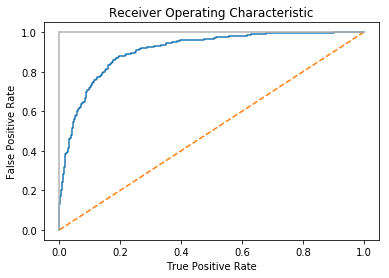

In [30]:
# Evaluating Binary Classifier Thresholds
# there is our ROC (Receiving Operating Characteristic)

# generate feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# create classifier
logit = LogisticRegression()
# train model
logit.fit(features_train, target_train)
# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:, 1]

# create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(
    target_test,
    target_probabilities)

# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c='.7')
plt.plot([1, 1], c='.7')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [10]:
# Evaluate Multiclass Classifier Predictions

# generate feature matrix and target vector
features, target = make_classification( n_samples=10000,
                                      n_features=3,
                                      n_informative=3,
                                      n_redundant=0,
                                      n_classes=3,
                                      random_state=1)

# create logistic regression
logit = LogisticRegression()
# cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [11]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

C:\Desktop\OpenCV_tutorial\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


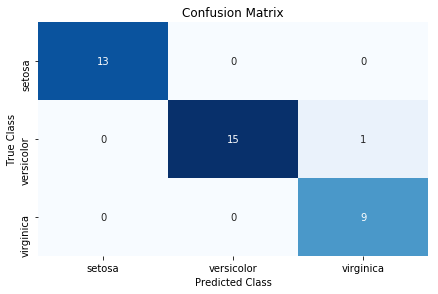

In [21]:
# Visualizing a Classifier's Perfomance

# load data
iris = load_iris()
# create feature matrix and target vector
features, target = iris.data, iris.target
# create list of target class names
class_names = iris.target_names

# create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)

# create logistic regression
classifier = LogisticRegression()
# train model and make predictions
classifier = classifier.fit(features_train, target_train)
target_predicted = classifier.predict(features_test)

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [25]:
# Evaluating Regression Models

# Use Mean Squared Erroe (MSE)
# generate feature matrix and target vector
features, target = make_regression(n_samples = 100,
                                  n_features=3,
                                  n_informative=3,
                                  n_targets=1,
                                  noise=50,
                                  coef=False,
                                  random_state=1)

# create a linear regression object
ols = LinearRegression()

# cross-validate the linear regresssion using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [26]:
# or use another common regression metric R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [30]:
# Evaluating Clustering Models

# generate feature matrix
features, _ = make_blobs(n_samples=1000,
                        n_features=10,
                        centers=2,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=1)

# cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# get predicted classes
target_predicted = model.labels_

# evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

In [34]:
# Create a Custom Evaluation Metric

# generate features matrix and target vector
features, target = make_regression(n_samples=100,
                                  n_features=3,
                                  random_state=1)

# create trainig and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# create custom metric
def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # return r-squared score
    return r2

# make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)
# create ridge regression object
classifier = Ridge()
# train ridge regression model
model = classifier.fit(features_train, target_train)

# apply custom metric
score(model, features_test, target_test)

0.9997906102882058

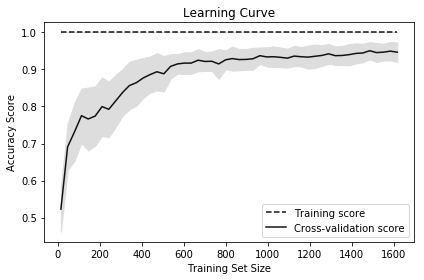

In [39]:
# Visualizing the Effect of Training Set Size

# load data
digits = load_digits()

# create feature matrix and target vector
features, target = digits.data, digits.target

# create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                       features,
                                                       target,
                                                       cv=10,
                                                       scoring='accuracy',
                                                       n_jobs=-1, 
                                                       train_sizes=np.linspace(
                                                       0.01,
                                                       1.0,
                                                       50))

# create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# draw lines
plt.plot(train_sizes, 
         train_mean,
         '--', 
        color='#111111',
        label='Training score')

plt.plot(train_sizes, 
         test_mean,
         color='#111111',
        label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std,
                test_mean + test_std, color='#DDDDDD')

# create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

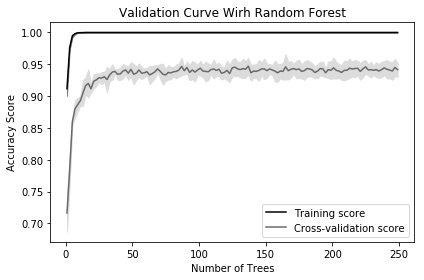

In [47]:
# Visualizing the Effect of Hyperparameter Values

# load data
digits = load_digits()
# create feature matrix and target vector
features, target = digits.data, digits.target

# create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accureacy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name='n_estimators',
                                            param_range=param_range,
                                            cv=3,
                                            scoring='accuracy',
                                            n_jobs=-1)

# calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean,
        label='Training score',
        color='black')
plt.plot(param_range, test_mean,
        label='Cross-validation score',
        color='dimgrey')

# plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                train_mean + train_std, color='grey')
plt.fill_between(param_range, test_mean - test_std,
                test_mean + test_std, color='gainsboro')

# create plot
plt.title('Validation Curve Wirh Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()